In [4]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from scipy import stats
import seaborn as sb
from matplotlib import pyplot as plt

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['axes.unicode_minus'] = False

In [41]:
sdf = {'남성' : [7.86, 6.32, 4.87], 
       '여성' : [7.8, 6, 4.83]}

mfdf = DataFrame(sdf)
mfdf

,남성,여성
0,7.86,7.80
1,6.32,6.00
2,4.87,4.83


In [48]:
mfdf.T

,0,1,2
남성,7.86,6.32,4.87
여성,7.80,6.00,4.83


## 성별 - 삶의 점수 시각화

([<matplotlib.axis.XTick at 0x2d6ad23d9d0>,
 [Text(2, 0, '최상위'), Text(1, 0, '중상위'), Text(0, 0, '최하위')])

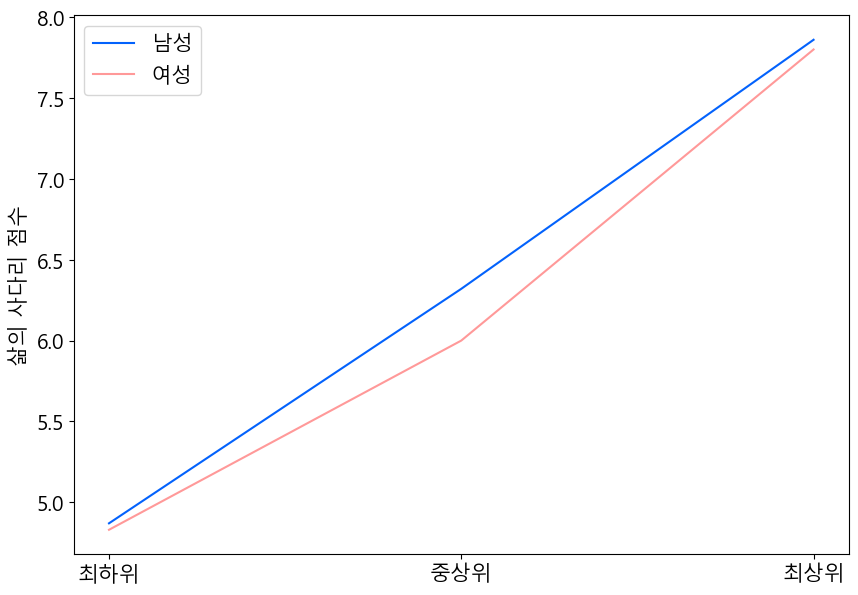

In [126]:
plt.figure()
sb.lineplot( x = mfdf.index[::-1], y = mfdf["남성"], color = '#0362fc', label= '남성')
sb.lineplot( x = mfdf.index[::-1], y = mfdf["여성"], color = '#ff9999', label= '여성')
plt.legend()

plt.ylabel("삶의 사다리 점수")
plt.xticks(mfdf.index[::-1],["최상위", "중상위", "최하위"])

> 여성이 성비에서 높게 나타났지만 삶의 사다리 점수에서는 남성이 여성보다 높게 나타났다.

 데이터 가져오기

In [62]:
df = pd.read_excel(r"C:\Users\User\MDblue\세미프로젝트3\데이터분석\환진분류.xlsx", index_col = 0)
df

,근로유형,삶의사다리점수,주거위치,총생활비,건강만족도,가족의수입만족도,주거환경만족도,가족관계만족도,직업만족도,사회적친분관계만족도,여가생활만족도,성별,교육수준,건강상태,만성질환,종교,혼인상태,연령
0,4,6,3,275,2,1,3,3,2,3,3,2,4,4,1,0,2,78
1,1,5,3,239,2,4,4,4,4,4,4,1,3,5,1,0,2,75
2,1,4,3,156,5,2,4,2,4,4,3,1,7,2,1,0,3,81
3,1,4,3,85,2,2,3,2,3,2,2,2,3,4,1,0,2,83
4,4,9,3,92,4,2,4,2,4,3,4,1,3,2,1,0,5,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3329,1,8,3,164,4,4,4,4,4,4,4,2,3,2,1,0,2,80
3330,1,9,3,99,4,4,4,4,4,4,3,2,3,2,1,0,2,80
3331,1,5,3,72,3,4,4,3,3,3,3,2,2,3,1,0,2,87
3332,1,8,3,77,4,3,4,4,4,4,4,2,3,2,1,0,2,80


성별 데이터 추출

In [63]:
qdf = df.filter(['성별'])
qdf

,성별
0,2
1,1
2,1
3,2
4,1
...,...
3329,2
3330,2
3331,2
3332,2


In [73]:
qdf.value_counts()

성별
2     2177
1     1157
Name: count, dtype: int64

## 성별 비율 시각화

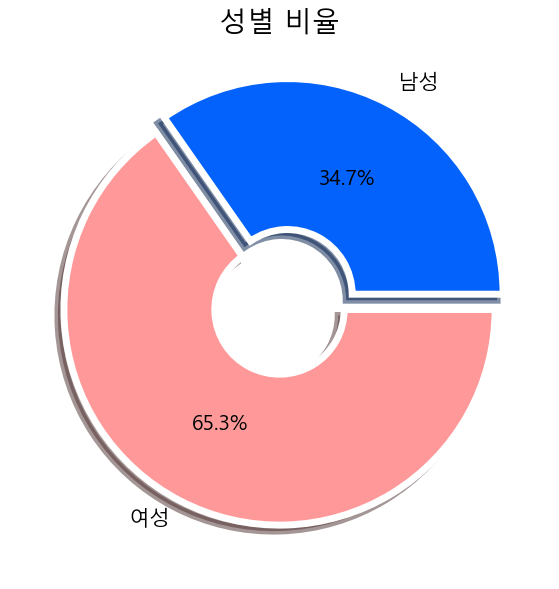

In [119]:
ratio = [34.7, 65.3]
labels = ['남성', '여성']
color = ['#0362fc','#ff9999']
explode = [0.08,0]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.rcParams['font.size'] = 15
plt.pie(ratio, labels = labels, startangle = 360, colors = color,explode = explode ,autopct = '%.1f%%', wedgeprops=wedgeprops, shadow=True)
plt.title('성별 비율', fontsize = 20)
plt.show()
plt.close()

In [101]:
cc = {'57세 미만' : [5.06, 6.6, 7.83], 
       '57세 이상 74세 미만' : [4.77, 6.15, 7.85],
       '74세 이상 82세 미만' : [4.23, 5.91, 7.18],
       '82세 이상' : [4.24, 5.8, 7.07]}

adf = DataFrame(cc)
adf

,57세 미만,57세 이상 74세 미만,74세 이상 82세 미만,82세 이상
0,5.06,4.77,4.23,4.24
1,6.60,6.15,5.91,5.80
2,7.83,7.85,7.18,7.07


## 연령 - 삶의 사다리 점수 시각화

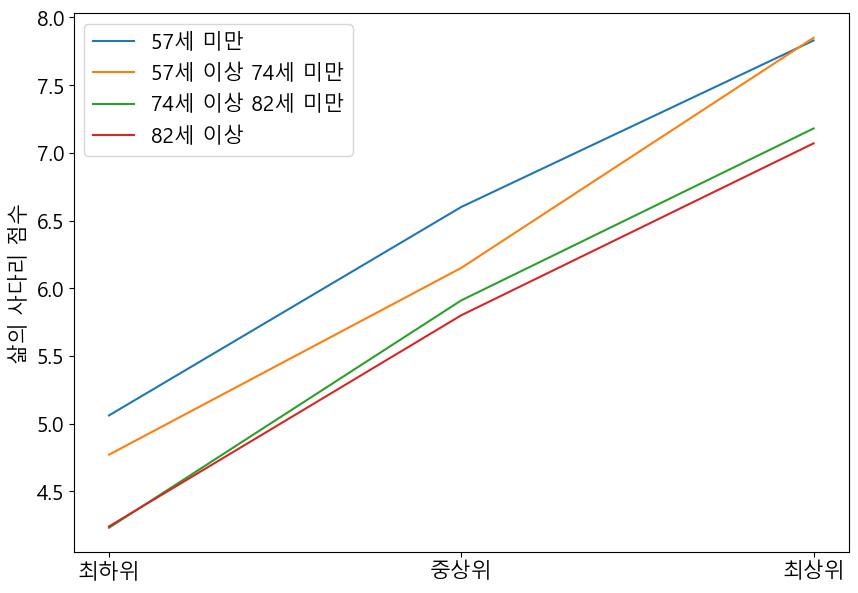

In [118]:
plt.figure()

sb.lineplot(data = adf, x = adf.index, y = adf['57세 미만'], label='57세 미만')
sb.lineplot(data = adf, x = adf.index, y = adf['57세 이상 74세 미만'],label='57세 이상 74세 미만')
sb.lineplot(data = adf, x = adf.index, y = adf['74세 이상 82세 미만'],label='74세 이상 82세 미만')
sb.lineplot(data = adf, x = adf.index, y = adf['82세 이상'],label='82세 이상')

plt.ylabel('삶의 사다리 점수')
plt.xticks([0, 1, 2], ['최하위', '중상위', '최상위'])
plt.legend()
plt.show()
plt.close()

> 연령대가 증가할수록 삶의 사다리 점수가 상대적은 낮게 나타났으며 연령대와 삶의 사다리 점수는 반비례 관계를 가진다. 즉 연령대가 낮을수록 삶의 사다리 점수가 높게 나타났다. 최상위 그룹의 경우 57세 미만 그룹과 57세 이상 74세 미만 그룹의 삶의 사다리 점수가 높은 경향을 보여준다.

## 교육수준

In [127]:
ee = {'무학' : [4.09, 5.56, 7.1], 
       '중졸' : [4.83, 6, 7.79],
       '고졸' : [4.83, 6.27, 7.82],
       '전문대졸' : [5.19, 6.56, 7.82],
       '대졸 이상' : [5.11, 6.84, 7.88]}

edf = DataFrame(ee)
edf

,무학,중졸,고졸,전문대졸,대졸 이상
0,4.09,4.83,4.83,5.19,5.11
1,5.56,6.00,6.27,6.56,6.84
2,7.10,7.79,7.82,7.82,7.88


## 교육수준 - 삶의 사다리 점수 시각화

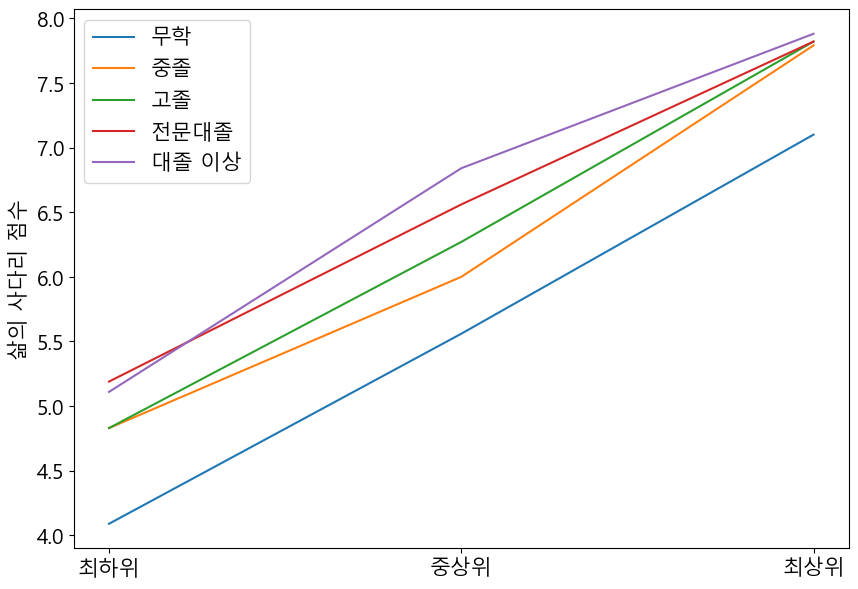

In [128]:
plt.figure()

sb.lineplot(data = edf, x = edf.index, y = edf['무학'], label='무학')
sb.lineplot(data = edf, x = edf.index, y = edf['중졸'],label='중졸')
sb.lineplot(data = edf, x = edf.index, y = edf['고졸'],label='고졸')
sb.lineplot(data = edf, x = edf.index, y = edf['전문대졸'],label='전문대졸')
sb.lineplot(data = edf, x = edf.index, y = edf['대졸 이상'],label='대졸 이상')

plt.ylabel('삶의 사다리 점수')
plt.xticks([0, 1, 2], ['최하위', '중상위', '최상위'])
plt.legend()
plt.show()
plt.close()

> 최하위에서 중상위로 갈수록 각 그룹 간의 격차가 발생하였다. 최상위 그룹의 경우 무학을 제외한 나머지 집단은 높은 만족도를 보이고 있으며 교육수준이 높을수록 삶의 사다리 점수가 높다.

## 근로형태

In [129]:
ww = {'임금근로자' : [5, 6.55, 7.85], 
       '자영업자, 고용주' : [5.33, 6.45, 7.91],
       '미취업자' : [4.14, 5.68, 7.1]}

wdf = DataFrame(ww)
wdf

,임금근로자,"자영업자, 고용주",미취업자
0,5.00,5.33,4.14
1,6.55,6.45,5.68
2,7.85,7.91,7.10


## 근로유형 - 삶의 사다리 점수 시각화

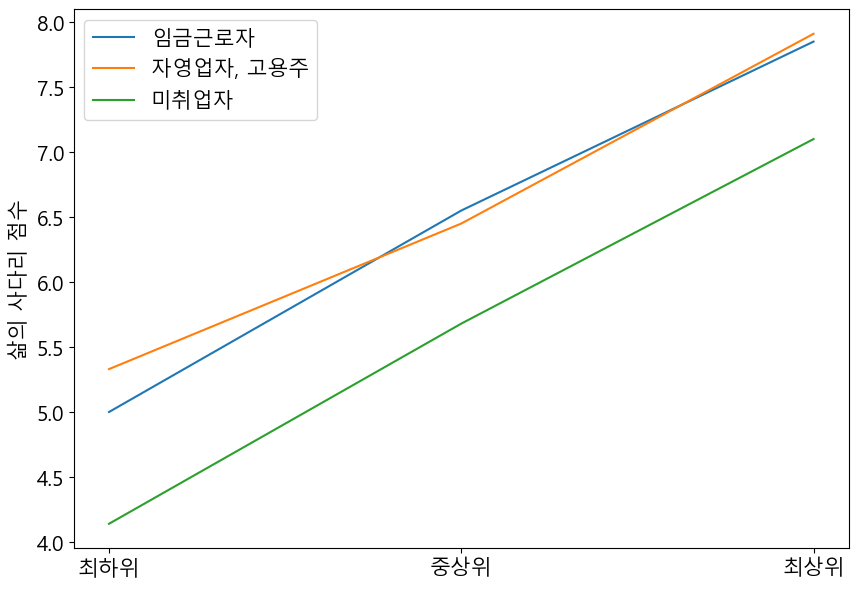

In [130]:
plt.figure()

sb.lineplot(data = wdf, x = wdf.index, y = wdf['임금근로자'], label='임금근로자')
sb.lineplot(data = wdf, x = wdf.index, y = wdf['자영업자, 고용주'],label='자영업자, 고용주')
sb.lineplot(data = wdf, x = wdf.index, y = wdf['미취업자'],label='미취업자')


plt.ylabel('삶의 사다리 점수')
plt.xticks([0, 1, 2], ['최하위', '중상위', '최상위'])
plt.legend()
plt.show()
plt.close()

> 미취업자에 비해 임금근로자와 자영업, 고용주의 삶의 사다리 점수는 높게 나타났다.